In [1]:
#imports
from Adjust.Model import Modelo
from Adjust.Treatment import Tratamento
from Adjust.Adjust import Ajuste, AjusteManchado
from Misc.Verify import converte, calculaLat
from Star.Estrela import Estrela
from Planet.Eclipse import Eclipse
from Planet.Planeta import Planeta
import numpy
import matplotlib.pyplot as plt
import corner

In [2]:
def plotLegendModel(ax, mission): 
 # Adicionando título e legendas dos eixos
    ax.set_title(f'Curva de luz extraída do Telescópio { mission } x Curva de luz modelo')
    ax.set_xlabel('Eixo X (Tempo)')
    ax.set_ylabel('Eixo Y (Brilho da estrela)')

    # Exibindo a legenda
    ax.legend()
    plt.show()

def plotLegendSpots(ax): 
   ax.set_title('Extração de ruídos da curva de luz')
   ax.set_xlabel('Tempo')
   ax.set_ylabel('Brilho da estrela')

    
   ax.legend()
   plt.show()


In [3]:
# -------------- Parâmetros de entrada --------------
# --------------------- Estrela ---------------------
star_name = 'Kepler-423'
cadence = 'short'
raio = 373. #default (pixel)
rsun = 0.95 # raio da estrela em Rsun
intensidadeMaxima = 240 #default
tamanhoMatriz = 856 #default 
u1 = 0.4650
u2 = 0.1518
star_temp = 5560.0 #em Kelvin


# --------------------- Planeta Kepler-423-b ---------------------
raio_plan_Jup = 1.192
semi_eixo_UA = 0.03585
angulo_inclinacao = 85.51 #em graus
periodo = 2.6843285 # day
mass_planeta = 0.595 #em relacao ao R de jupiter
lua = False 
ecc = 0
anomalia = 0


#etapa de conversão
#raioStar, raioPlanetaRstar , semiEixoRaioStar = converte(rsun, raio_plan_Jup, semi_eixo_UA)

0.44321274757385254


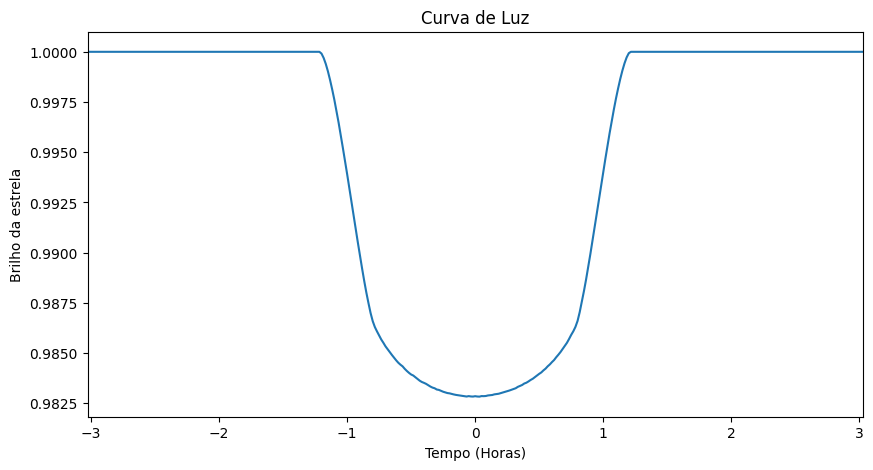

In [4]:
estrela_ = Estrela(raio, rsun, intensidadeMaxima, u1, u2, tamanhoMatriz)

Nx = estrela_.getNx()
Ny = estrela_.getNy()
raioEstrelaPixel = estrela_.getRaioStar()

planeta_ = Planeta(semi_eixo_UA, raio_plan_Jup, periodo, angulo_inclinacao, ecc, anomalia, estrela_.getRaioSun(), mass_planeta)

eclipse = Eclipse(Nx, Ny, raioEstrelaPixel, estrela_, planeta_)
estrela_.setStarName(star_name)
estrela_.setCadence(cadence)
eclipse.setTempoHoras(1.)

eclipse.criarEclipse(anim=False)
lc0 = numpy.array(eclipse.getCurvaLuz()) 
ts0 = numpy.array(eclipse.getTempoHoras())

0.47579383850097656


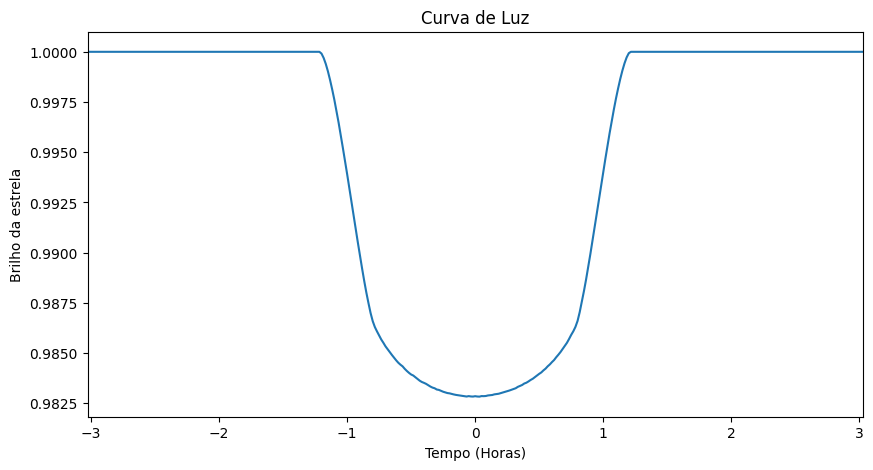

Number of transits :::::: 333.0


In [5]:
mission = "KEPLER"

modelo = Modelo(estrela_, eclipse, mission)

ls_model, ts_model = modelo.eclipse_model()

time, flux, flux_err = modelo.rd_data(0, 0)

modelo.setTime(time)
modelo.setFlux(flux)
modelo.setFluxErr(flux_err)

x0, nt = modelo.det_x0(0)

print("Number of transits ::::::",nt)

0.41364097595214844


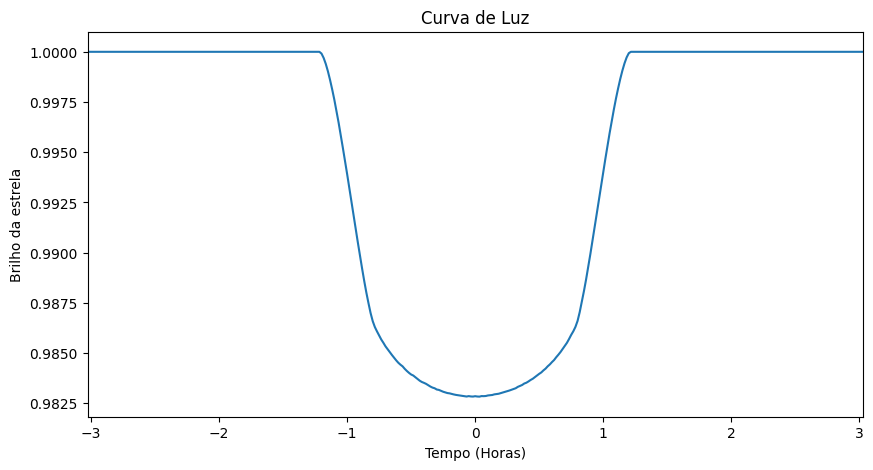

In [6]:
tratamento = Tratamento(modelo)

dur, tim, lcurve, f_err = tratamento.cut_transit_single()

t_p = tim[100]
s_lc = lcurve[100]

bb = numpy.where((t_p >= min(ts0)) & (t_p <= max(ts0)))
bb = numpy.where((ts0 >= -5.) & (ts0 <= 5.))
dd = numpy.where((t_p >= -5.) & (t_p <= 5.))

In [ ]:
for i in range(1000):
    try:
        selectedTransit = i #transito selecionado
        time_phased, smoothed_LC = tratamento.select_transit_smooth(selectedTransit)

        plt.rcParams['figure.figsize']= 8, 4
        graf1,ax = plt.subplots()

        ax.plot(time_phased, smoothed_LC, "r.", ms = 2)
        ax.plot(ts_model, ls_model, "b.", ms = 2)
        ax.annotate(f"Transito: {i}", (-6, 0.980))
    except:
        pass

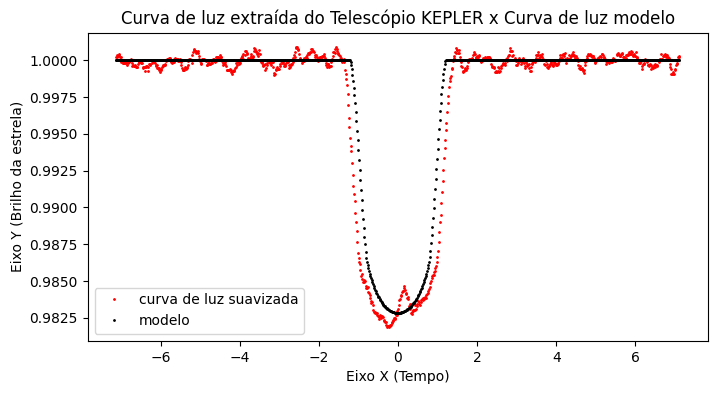

In [7]:
selectedTransit = 2 #transito selecionado
time_phased, smoothed_LC = tratamento.select_transit_smooth(selectedTransit)

plt.rcParams['figure.figsize']= 8, 4
graf1,ax = plt.subplots()

ax.plot(time_phased, smoothed_LC, "r.", ms = 2, label="curva de luz suavizada")
ax.plot(ts_model, ls_model, "k.", ms = 2,label="modelo")
ax.annotate(f"Transito: {2}", (-6, 0.980))

plotLegendModel(ax, mission)

1.15


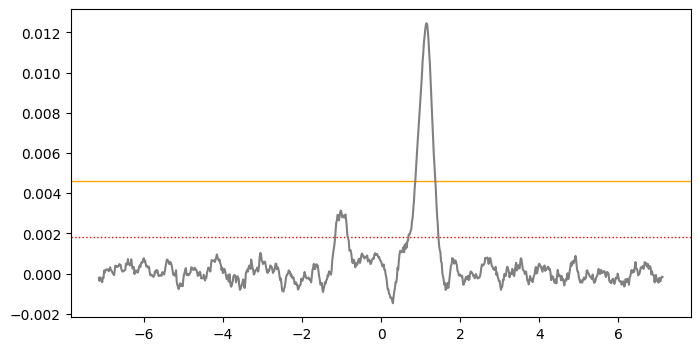

In [8]:
result_LC = ls_model[:856] - smoothed_LC[:856]
std = numpy.std(result_LC)
mean_std = std*2.5

plt.rcParams['figure.figsize']= 8, 4
graf1,ax = plt.subplots()

ax.axhline(y=std, color='r', linestyle='dotted', linewidth=1, label="desvio padrão")
ax.axhline(mean_std,color='orange', linestyle='-', linewidth=1, label="2.5*dp")
ax.plot(ts_model, result_LC, "grey", ms = 2, label="ruídos extraídos")

max_value = numpy.max(result_LC)
position = numpy.argmax(result_LC)
time_spot = ts_model[position]
print(time_spot)

In [9]:
tempoHoras = eclipse.getTempoTransito()
print(tempoHoras)

6.053178735443959


In [10]:
latsugerida = eclipse.calculaLatMancha()
longsugerida = eclipse.calculaLongMancha(semi_eixo_UA, 1.15, latsugerida)

A latitude sugerida para que a mancha influencie na curva de luz da estrela é: -38.55205169299745
A longitude sugerida para que a mancha influencie na curva de luz da estrela é: 0.2939702267770731


In [11]:
raio_mancha = 0.07
intensidade = 0.5 
latitude = latsugerida
longitude = 20

mancha = Estrela.Mancha(intensidade, raio_mancha, latitude, longitude)
#mancha2 = Estrela.Mancha(0.6, 0.04, latitude, longitude) 


estrela_.addMancha(mancha)
#estrela_.addMancha(mancha2) #caso queira adicionar mais manchas

estrela_.criaEstrelaManchada()
estrela_matriz = estrela_.getMatrizEstrela()

In [12]:
%matplotlib tk

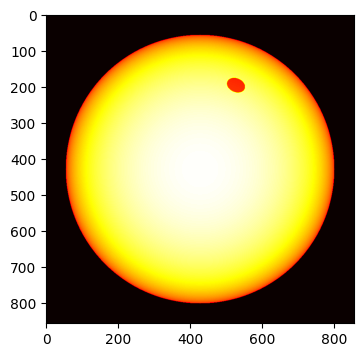


Aguarde um momento, a animacao do trânsito está sendo gerada...



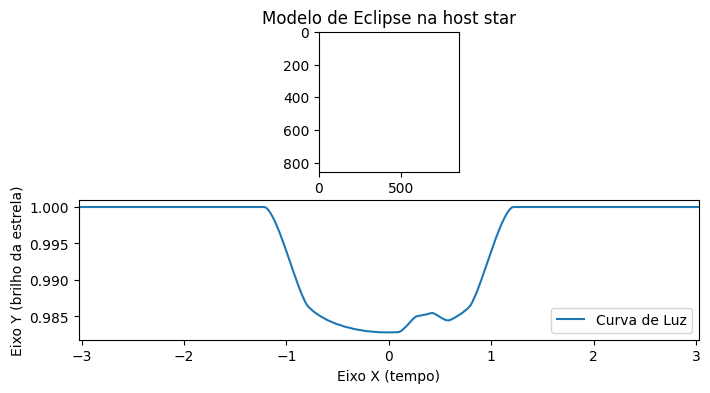

Tempo Total (Trânsito): 6.053178735443959


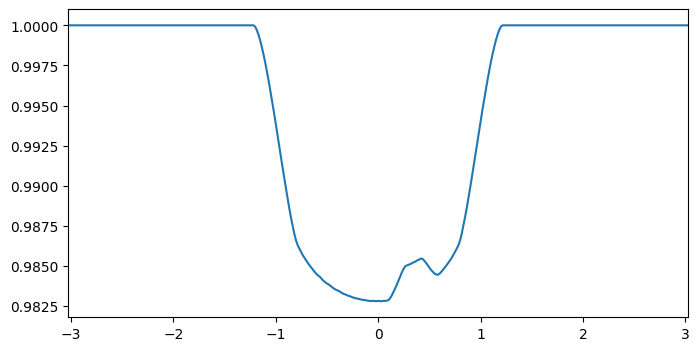

In [12]:
# Eclipse

# Passa para o eclipse a estrela atualizada
eclipse.setEstrela(estrela_matriz)

estrela_.Plotar(tamanhoMatriz, estrela_matriz)
eclipse.criarEclipse(anim=True)

print ("Tempo Total (Trânsito):",eclipse.getTempoTransito()) 
tempoTransito = eclipse.getTempoTransito()
curvaLuz = eclipse.getCurvaLuz()
tempoHoras = eclipse.getTempoHoras()

#Plotagem da curva de luz 
plt.plot(tempoHoras,curvaLuz)
plt.axis([-tempoTransito/2,tempoTransito/2,min(curvaLuz)-0.001,1.001])                       
plt.show()

0.4749138355255127


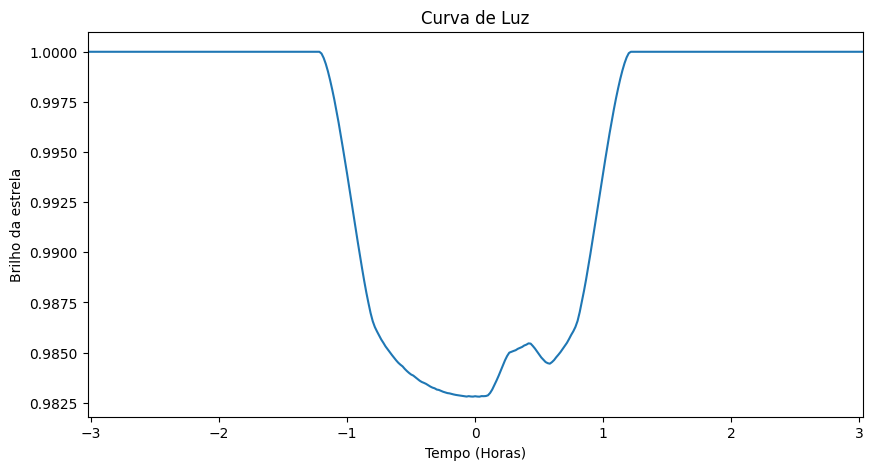

In [13]:
modelo = Modelo(estrela_, eclipse, mission)

ls_model, ts_model = modelo.eclipse_model()

time, flux, flux_err = modelo.rd_data(0, 0)

modelo.setTime(time)
modelo.setFlux(flux)
modelo.setFluxErr(flux_err)

x0, nt = modelo.det_x0(0)

0.4453721046447754


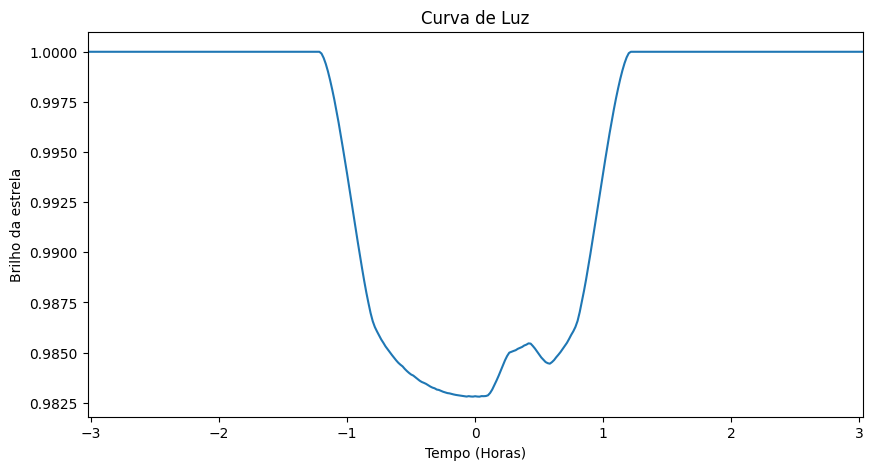

In [14]:
tratamento = Tratamento(modelo)

dur, tim, lcurve, f_err = tratamento.cut_transit_single()

t_p = tim[100]
s_lc = lcurve[100]

bb = numpy.where((t_p >= min(ts0)) & (t_p <= max(ts0)))
bb = numpy.where((ts0 >= -5.) & (ts0 <= 5.))
dd = numpy.where((t_p >= -5.) & (t_p <= 5.))

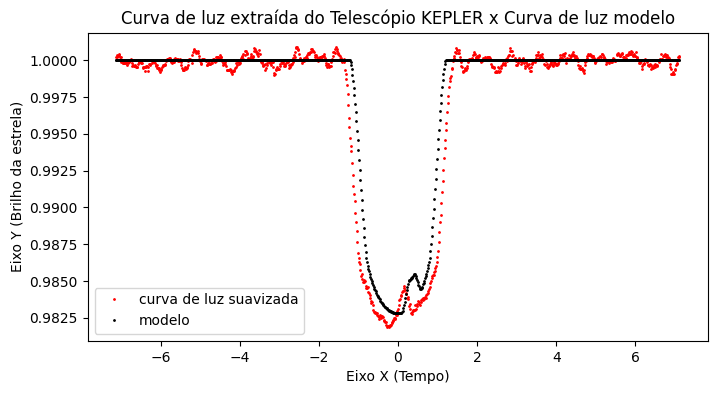

In [15]:
selectedTransit = 2 #transito selecionado
time_phased, smoothed_LC = tratamento.select_transit_smooth(selectedTransit)

plt.rcParams['figure.figsize']= 8, 4
graf1,ax = plt.subplots()

ax.plot(time_phased, smoothed_LC, "r.", ms = 2, label="curva de luz suavizada")
ax.plot(ts_model, ls_model, "k.", ms = 2,label="modelo")
ax.annotate(f"Transito: {2}", (-6, 0.980))

plotLegendModel(ax, mission)